# Test Dataset
test dataset is corresponding with the test case as in the reference

`pyvol` can provide fast and efficient local volatility surface corresponding to the market prices.

In [1]:
strikes = [355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0, 377.5, 380.0, 382.5, 385.0, 387.5, 390.0]
dt = 1/365.0
ttms = [6 * dt, 34 * dt, 62 * dt]
initial_price = 356.01
r = 0.0151
market_prices = [3.61, 2.20, 1.22, 0.62, 0.25, 0.11, 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
                7.52, 6.09, 4.85, 3.82, 2.95, 2.18, 1.60, 1.14, 0.79, 0.54, 0.39, 0.27, 0.21, 0.15, 0.12,
                10.00, 8.55, 7.04, 6.35, 5.29, 4.37, 3.32, 2.68, 2.30, 1.74, 1.47, 1.16, 0.91, 0.72, 0.55]

from pyvol import LocalVolatilitySurface, OptionType, Interpolator 
span = 3
interval = 100
surface= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)
vol= surface.LocalVol()
numerical_value = surface.VanillaFD(vol.T)

## Data Visualization

### Numerical Values vs Market Data

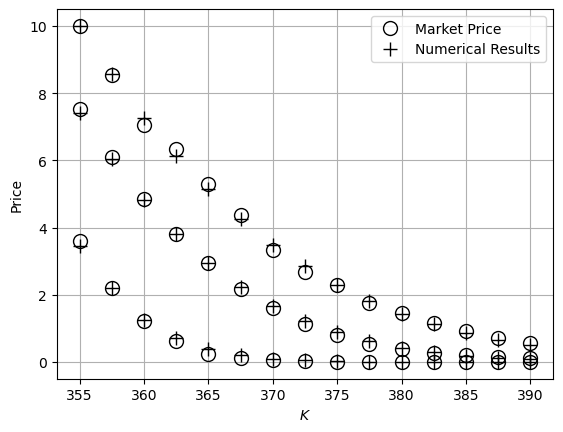

In [2]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Local Volatility Interpolator

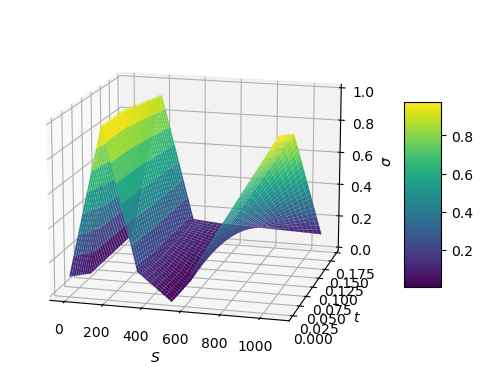

In [3]:
x, y = np.meshgrid(surface.GetPrices(), surface.GetTimes())
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, surface.GetVolSurf().T, cmap = 'viridis')
ax.set_xlabel("$S$")
ax.set_ylabel('$t$')
ax.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax)
ax.set_zlim([0, 1.0])
ax.view_init(azim =-75, elev=15)
plt.show()

## Simple Test 2

In [4]:
strikes = [310.0, 312.5, 315.0, 317.5, 320.0]
dt = 1/365.0
ttms = [30 * dt, 58 * dt, 86 * dt]
initial_price = 301.53
r = 0.0149
market_prices = [1.43, 0.93, 0.59, 0.35, 0.20, 2.99, 2.29, 
                 1.66, 1.22, 0.89, 4.28, 3.51, 2.79, 2.13, 1.84]

span = 3
interval = 100
from pyvol import LocalVolatilitySurface, OptionType, Interpolator
surface2= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)
vol2= surface2.LocalVol()
numerical_value2 = surface2.VanillaFD(vol2)

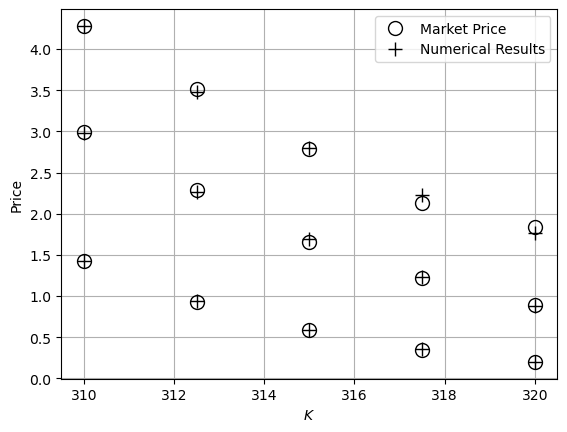

In [5]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value2, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

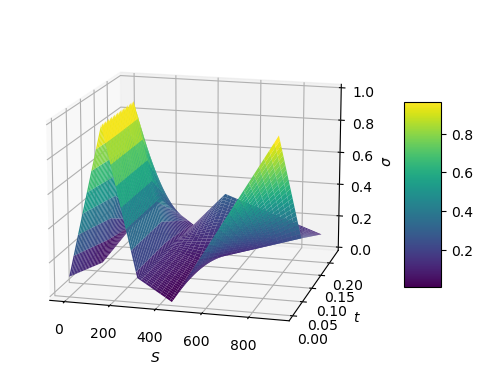

In [6]:
x, y = np.meshgrid(surface2.GetPrices(), surface2.GetTimes())
fig = plt.figure() 
ax2  = fig.add_subplot(111, projection = '3d')
surf = ax2.plot_surface(x, y, surface2.GetVolSurf().T, cmap = 'viridis')
ax2.set_xlabel("$S$")
ax2.set_ylabel('$t$')
ax2.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax2)
ax2.set_zlim([0, 1.0])
ax2.view_init(azim =-75, elev=15)
plt.show()

## Emprical Analysis
Utilizing Real Financial Option data. CSI 300 Index financial option on 25th October, 2023.

In [1]:
initial_price  = 3504.46
dt = 1/244.0
r = 0.02

call_prices = [412.2,332.0,218.0,127.8,61.4,24.0,9.0,3.0,1.2,
               397.6,325.4,237.0,160.0,96.4,55.4,31.6,18.8,12.0,
               386.2,342.4,259.6,202.2,136.6,86.4,56.2,35.0,23.4,
               466.0,372.8,292.4,220.8,166.4,117.4,83.0,58.0,43.4,
               485.6,437.0,337.8,262.4,209.4,160.6,121.8,91.6,67.0,
               504.6,429.8,362.0,299.4,246.4,192.0,157.6,122.8,101.0]
strikes = [3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0]
future_prices = [3506.8833360790663,3524.9440888558106,3506.8048416325546,3503.6655944092986,3502.5263471860426,3501.987099962787,3499.847852739531,3505.108605516275,3509.169358293019,
                 3482.812602838516,3505.709783575243,3506.606964311969,3508.904145048695,3507.0013257854216,3507.898506522148,3504.5956872588745,3506.4928679956006,3505.3900487323267,
                 3461.5386854973153,3501.4399334165837,3498.1411813358513,3525.84242925512,3520.943677174388,3524.8449250936565,3511.5461730129246,3512.6474209321927,3515.3486688514613,
                 3521.5022803363645,3516.7184829278604,3514.9346855193558,3513.1508881108516,3519.1670907023467,3520.9832932938425,3515.999495885338,3515.215698476834,3534.631901068329,
                 3501.6096956649194,3532.7067826218527,3507.203869578785,3498.9009565357183,3501.1980434926513,3498.6951304495838,3498.392217406517,3504.0893043634496,3501.186391320383,
                 3490.0507958085673,3490.839531157231,3495.428266505894,3500.0170018545573,3501.805737203221,3494.7944725518846,3498.1832079005476,3496.371943249211,3522.160678597875]
# calculated future price pv
ttms = [17.0*dt, 37.0*dt, 61.0*dt, 96.0*dt, 160.0*dt, 223.0*dt]
span = 3
interval = 100
from pyvol import LocalVolatilitySurface, OptionType, Interpolator 
local_vol_surf = LocalVolatilitySurface(initial_price, future_prices, ttms, strikes, call_prices,
                                        OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)

vol = local_vol_surf.LocalVol()
numerical_value = local_vol_surf.VanillaFD(vol.T)

## RMSE Calculation

In [5]:
import numpy as np
err = 0
n = len(call_prices)
for i in range(n):
    err += np.power(numerical_value[i] - call_prices[i], 2)

RMSE = np.sqrt(err/n)
RMSE

4.914292031344813

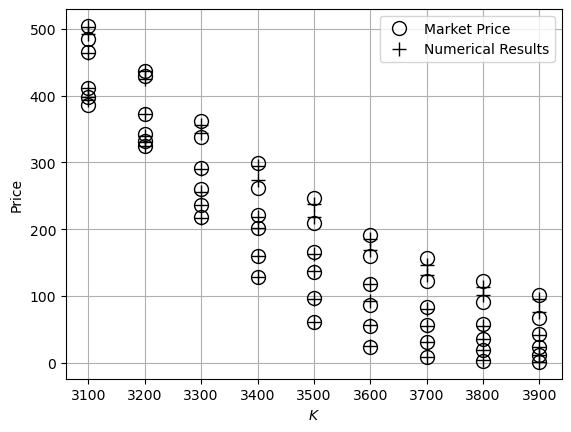

In [6]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, call_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

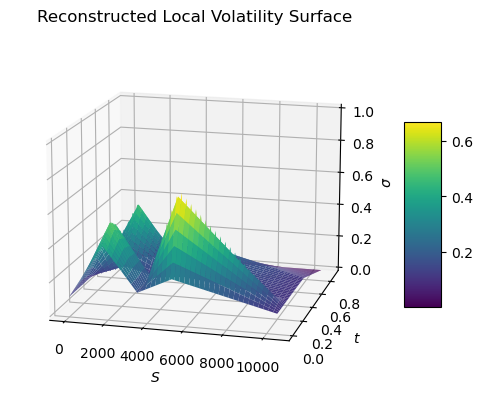

In [46]:
x, y = np.meshgrid(local_vol_surf.GetPrices(), local_vol_surf.GetTimes())
fig = plt.figure() 
surf = ax2.plot_surface(x, y, local_vol_surf.GetVolSurf().T, cmap = 'viridis')
ax2.set_xlabel("$S$")
ax2.set_ylabel('$t$')
ax2.set_zlabel('$\sigma$')
ax2.set_title("Reconstructed Local Volatility Surface")
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax2)
ax2.set_zlim([0, 1.0])
ax2.view_init(azim =-75, elev=15)
plt.show()

## Comparison with Implied Volatility Surface

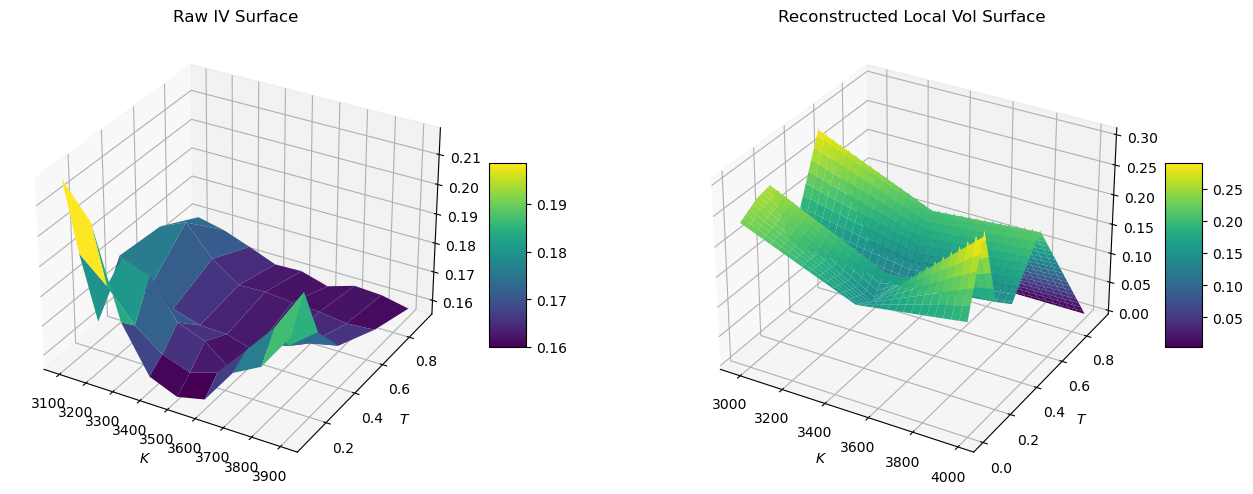

In [44]:
import pandas as pd
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(121, projection='3d')
ivs = pd.read_csv("iv_io.csv", index_col = 0).values.astype(float)
ivs = ivs.reshape(len(ttms), len(strikes))
strikes_mesh, ttms_mesh = np.meshgrid(strikes, ttms)
surf = ax.plot_surface(strikes_mesh, ttms_mesh, ivs, cmap='viridis')
ax.set_xlabel("$K$")
ax.set_ylabel("$T$")
ax.set_title("Raw IV Surface")
fig.colorbar(surf, shrink=0.2, aspect=5)
ax2 = fig.add_subplot(122, projection='3d')
x, y = np.meshgrid(local_vol_surf.GetPrices(), local_vol_surf.GetTimes())
local_surf_data = local_vol_surf.GetVolSurf().T
surf2 = ax2.plot_surface(x[:, 85:115], y[:, 85:115], local_surf_data[:, 85:115], cmap = 'viridis')
ax2.set_title("Reconstructed Local Vol Surface")
ax2.set_xlabel("$K$")
ax2.set_ylabel("$T$")
fig.colorbar(surf2, shrink=0.2, aspect=5)

plt.show()
